# ¡Hola David! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

David has realizado un análisis exploratorio de datos sobresaliente, demostrando una comprensión profunda y un ajuste preciso de la información. Tu uso estratégico de las herramientas de visualización fue destacable, permitiéndote obtener insights valiosos. Te recomiendo continuar utilizando estas herramientas cuando te enfrentes a grandes volúmenes de datos o necesites realizar comparaciones detalladas. Por otro lado, tu dominio de las metodologías de pruebas de hipótesis es muy sólido y demuestra una capacidad analítica crítica. 
    
Recuerda que es crucial incluir tus análisis en cada sección y una conclusión general. Un proyecto en el contexto de ciencia o análisis de datos va más allá de escribir código y obtener valores; se trata de darles sentido y contexto para convertirlos en conocimiento útil. Este proceso permite tomar decisiones informadas, optimizar modelos y comunicar hallazgos de manera clara y efectiva, asegurando que el análisis no solo sea técnico, sino también comprensible y aplicable a la resolución de problemas reales. Ten muy presente esto para futuros proyectos.
    
    
¡Te deseo muchos éxitos en tu próximo Sprint! 🚀 
    
*Estado del Proyecto:* **Aprobado**

</div>

---

# Descripcion del proyecto.

 Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los generos, las plataformas (por ejemplo, Xbox o Playstation) y los datos historicos sobre las ventas de juegos estan disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene exito o no. Esto te permitira detectar proyectos prometedores y planificar camppañas publicitarias. 
 
 Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre del 2016 y estas planeando una campaña para 2017.
 
 Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estas pronosticando las ventas del 2017 en funcion de los datos del 2016 o las ventas de 2027 en funcno de los datos de 2026.
 
 El dataset contiene una columna 'rating' que almacena la clasificacion ESRB de cada juego. El Entertainment Software Rating Board (la junta de clasificacion de software de entretenimiento) evalua el contenido de un juego y asigna una clasificacion de edad como Adolescente o Adulto. 
 
 ## Abre el archivo de datos y estudia la informacion general. (Ruta de archivo: /datasets/games.csv)        

In [74]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

df = pd.read_csv('/datasets/games.csv')
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2

## Prepara los datos.

1. Reemplaza los nombres de las columnas. (ponlos en minusculas.)

In [75]:
df.rename(columns = {col: col.lower() for col in df.columns}, inplace=True)
print(df)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

2. Convierte los datos en los tipos necesarios.

In [76]:
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2

LIMPIEMOS LOS DATOS DE LA COLUMNA YEAR OF RELEASE.

In [77]:
#Cantidad de valores ausentes por columna.
print(df.isna().sum())
#Porcentaje de datos ausentes.
print(df.isna().mean()*100)

#Calculamos la diferencia de la media y la mediana para ver que tan sesgados o dispersos estan los datos en la columna year of release
print(f"La media de la columna year of release es: {df['year_of_release'].mean(skipna=True)} y la mediana es {df['year_of_release'].median(skipna=True)}")

#Calculamos los datos existentes en la columna
print(f"Los valores existentes de la columna year of release en orden son {pd.Series(df['year_of_release'].unique()).sort_values().values}")

#Como podemos observar los datos son muy diferentes especialmente en la media que pueda ser que haya muchos años de antiguedad por lo que es mejor
#sustituir con la mediana. Esto lo consideramos de esta manera ya que el porcentaje de valores nulos no supera el 20%. Tambien a la hora de visualizar los datos 
#nulos podemos observar que la mayoria de años de lanzamiento fueron en los años 1900. 

df['year_of_release'].fillna(2007, inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int')
print(df['year_of_release'])
df.info()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64
La media de la columna year of release es: 2006.4846163200777 y la mediana es 2007.0
Los valores existentes de la columna year of release en orden son [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
0    

LIMPIEMOS LOS DATOS DE CRITIC SCORE.

In [78]:
print(f"Los valores unicos de la columna critic score son {pd.Series(df['critic_score'].unique()).sort_values().values}")
print(f"La media de este set de datos de la columna critic score es: {df['critic_score'].mean()} y la mediana es: {df['critic_score'].median()}")

#Podemos observar que los datos ausentes de la columna critic score son mas el 20% . Por lo que empezaremos a sustituir los valores ausentes por valores
#TBD

df['critic_score'].fillna(71, inplace=True)
df['critic_score'] = df['critic_score'].astype('int')
df.info()

Los valores unicos de la columna critic score son [13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]
La media de este set de datos de la columna critic score es: 68.96767850559173 y la mediana es: 71.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-nu

LIMPIEMOS LOS DATOS DE LA COLUMNA USER SCORE.

In [79]:
print(pd.Series(df['user_score'].unique()).sort_values().values)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()
print(f"La media de la columna user_score: {df['user_score'].mean(skipna=True)} y la mediana es de: {df['user_score'].median(skipna=True)}")

df['user_score'].fillna(7.5, inplace=True)
df.info()

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64


LIMIPIEMOS LOS DATOS DE LA COLUMNA RATING.

In [80]:
print(pd.Series(df['rating'].unique()).sort_values().values)
print(f"La moda o el valor mas frecuente de la columna rating es: {df['rating'].mode()[0]}")

df['rating'].fillna('E', inplace=True)
df.dropna(inplace=True)
df.info()

['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]
La moda o el valor mas frecuente de la columna rating es: E
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


CALCULA LAS VENTAS TOTALES (LA SUMA DE LAS VENTAS EN TODAS LAS REGIONES) PARA CADA JUEGO Y COLOCA ESTOS VALORES EN UNA COLUMNA SEPARADA.

In [81]:
def ventas_totales(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

df['total_sales'] = df.apply(ventas_totales, axis=1)
print(df)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente la función`info`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. Con esta información, podemos establecer una hoja de ruta para ajustar, modificar y analizar los datos de una manera adecuada. Adicionalmente, hiciste la comprobación de datos faltantes, esto evitará que tengamos errores o sesgos en el análisis, y ajustaste el nombre de la columnas, lo cual es clave para facilitar el trabajo con el dataset
</div>

3. Analiza los datos.

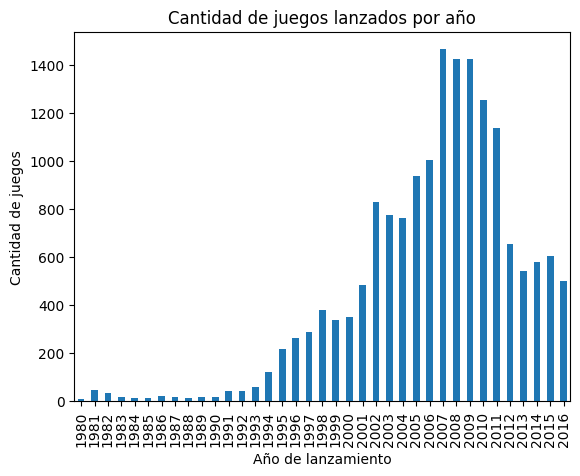

In [82]:
#Mira cuantos juegos fueron lanzados en diferentes años ¿Son significativos los datos de cada periodo?

countgames_released = df.groupby('year_of_release')['name'].count()
countgames_released.plot(kind='bar', x='year_of_release', xlabel='Año de lanzamiento', title='Cantidad de juegos lanzados por año', ylabel='Cantidad de juegos')
plt.show()

¿Son significativos los datos de cada periodo? Podrmos constatar que hubo una tendencia alcista desde 1992 que vio su punto cuspide hasta 2007 y desde  ahi el numero ha ido descendiendo convertiendose en una tendencia bajista.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

David buen trabajo. Has identificado correctamente el período de mayor actividad, con un pico en 2008, lo que coincide con avances tecnológicos y la proliferación de nuevas plataformas. 
</div>

Observa como varian las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribucion basada en los datos de cada año. Busca las plataformas que solian ser populares pero que ahora no tienen ventas. ¿Cuanto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.?

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


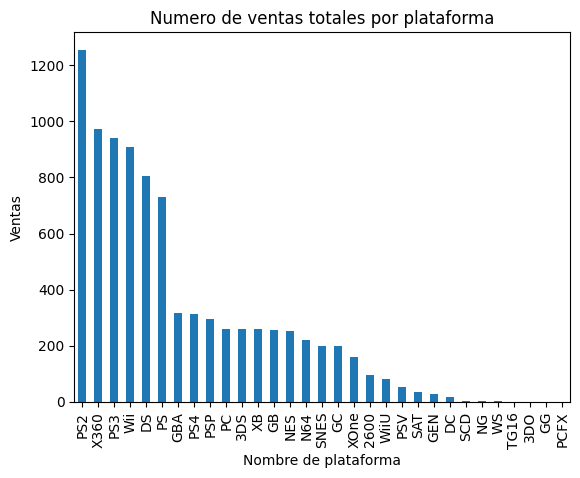

In [83]:
print(df['platform'].unique())
platforms_greatestsellers = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_greatestsellers.plot(kind='bar', title='Numero de ventas totales por plataforma', ylabel='Ventas', xlabel='Nombre de plataforma')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Perfecto, vemos un dominio claro por parte de PS

</div>

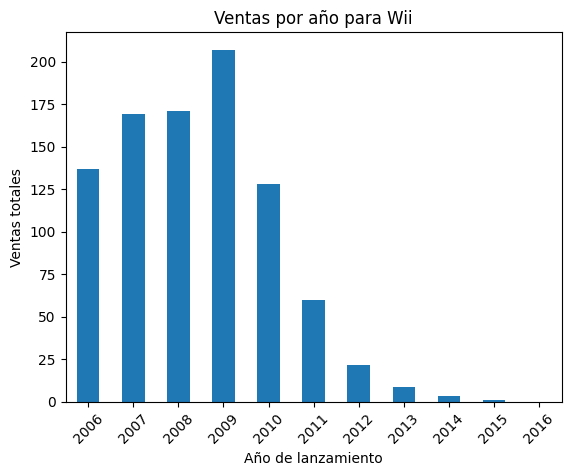

year_of_release
2006    137.15
2007    169.10
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2009


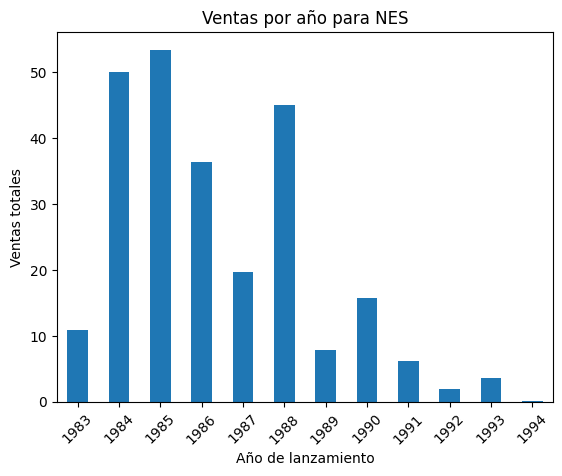

year_of_release
1983    10.96
1984    50.08
1985    53.44
1986    36.41
1987    19.76
1988    45.01
1989     7.85
1990    15.73
1991     6.11
1992     1.98
1993     3.61
1994     0.11
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1985


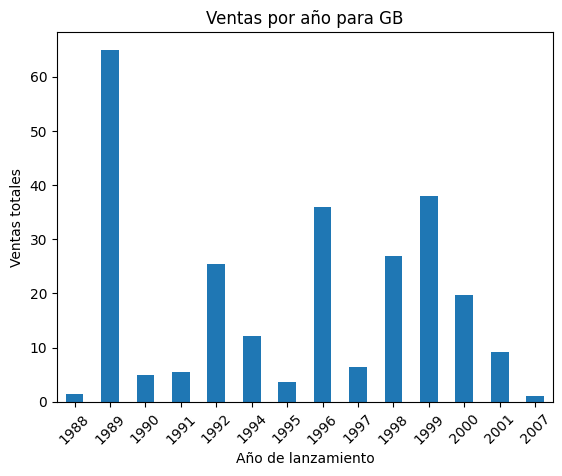

year_of_release
1988     1.43
1989    64.97
1990     4.89
1991     5.57
1992    25.49
1994    12.18
1995     3.60
1996    36.03
1997     6.37
1998    26.90
1999    38.00
2000    19.76
2001     9.24
2007     1.03
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1989


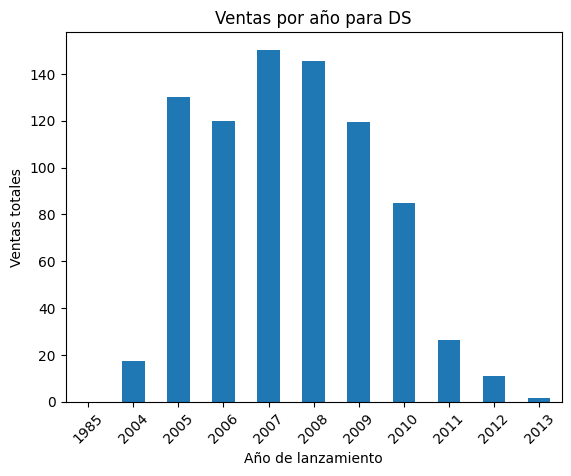

year_of_release
1985      0.02
2004     17.27
2005    130.14
2006    119.81
2007    150.28
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2007


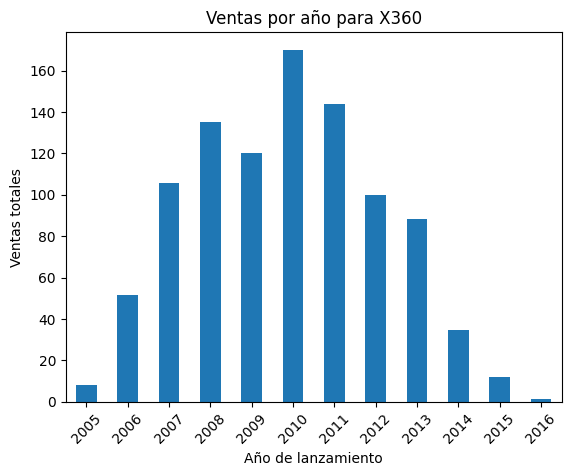

year_of_release
2005      8.25
2006     51.62
2007    105.59
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2010


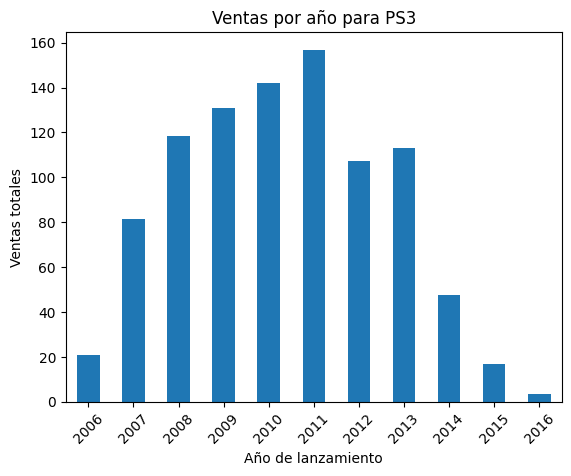

year_of_release
2006     20.96
2007     81.50
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2011


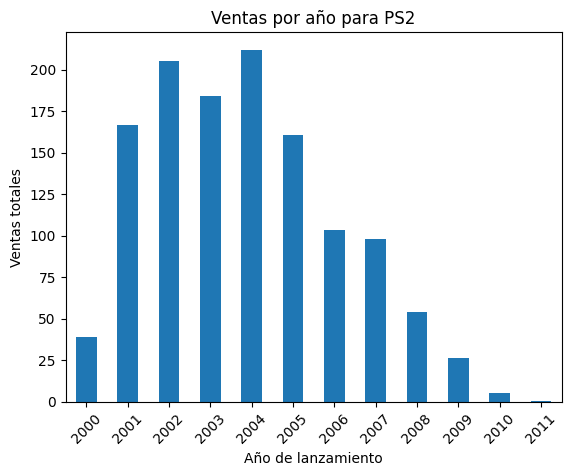

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     98.20
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2004


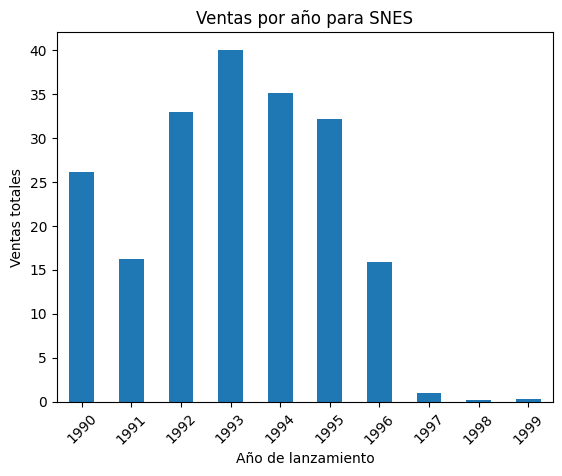

year_of_release
1990    26.15
1991    16.22
1992    32.98
1993    40.02
1994    35.08
1995    32.20
1996    15.92
1997     0.99
1998     0.22
1999     0.26
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1993


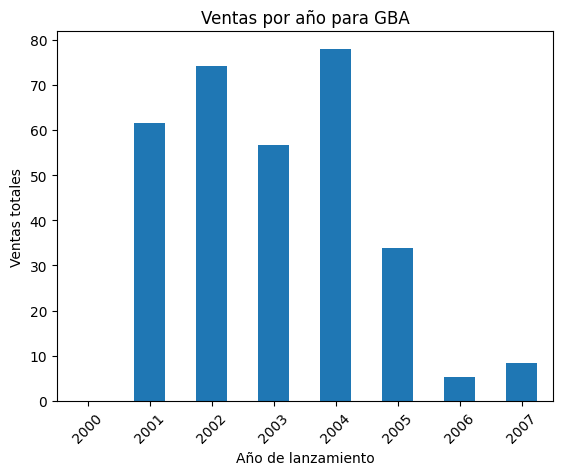

year_of_release
2000     0.07
2001    61.53
2002    74.16
2003    56.67
2004    77.91
2005    33.86
2006     5.28
2007     8.37
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2004


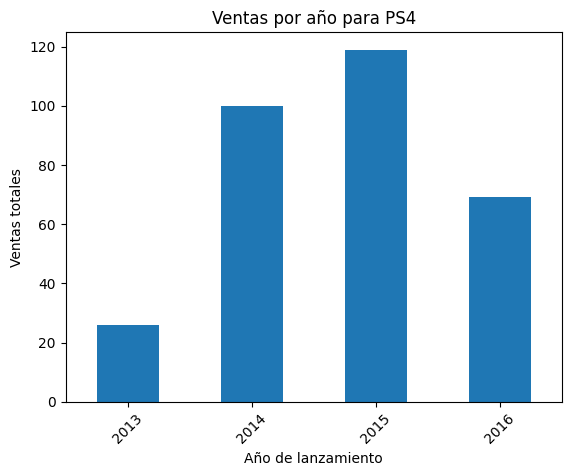

year_of_release
2013     25.99
2014    100.00
2015    118.90
2016     69.25
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2015


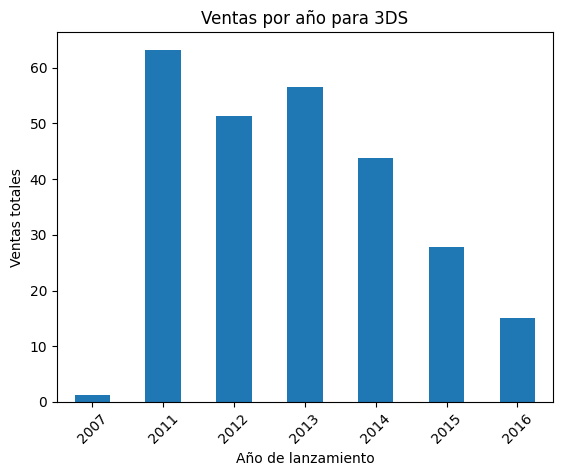

year_of_release
2007     1.19
2011    63.20
2012    51.36
2013    56.57
2014    43.76
2015    27.78
2016    15.14
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2011


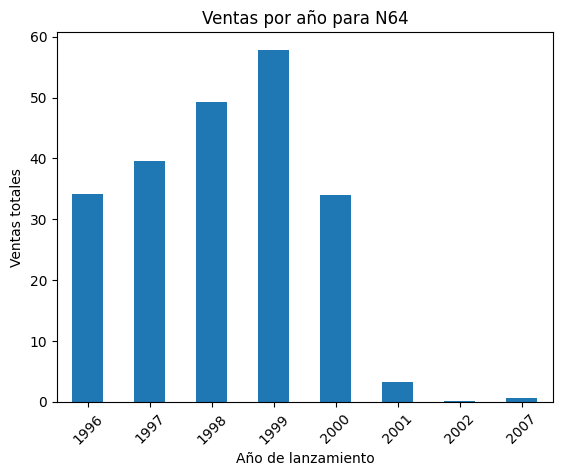

year_of_release
1996    34.10
1997    39.50
1998    49.24
1999    57.87
2000    33.97
2001     3.25
2002     0.08
2007     0.67
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1999


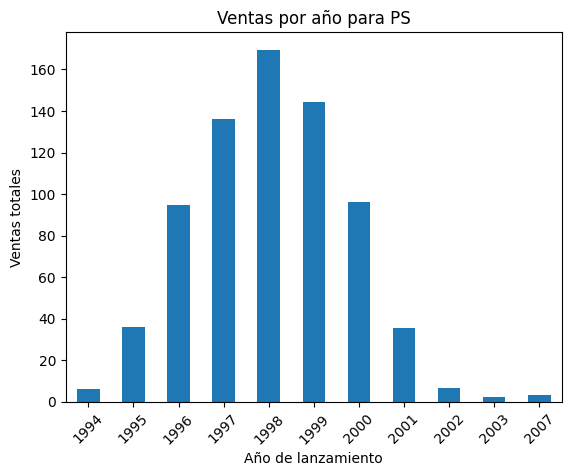

year_of_release
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000     96.37
2001     35.59
2002      6.67
2003      2.07
2007      3.28
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1998


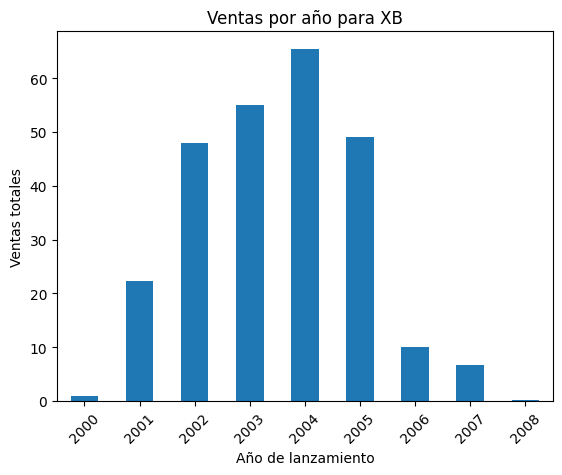

year_of_release
2000     0.99
2001    22.26
2002    48.01
2003    55.04
2004    65.42
2005    49.08
2006    10.04
2007     6.72
2008     0.18
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2004


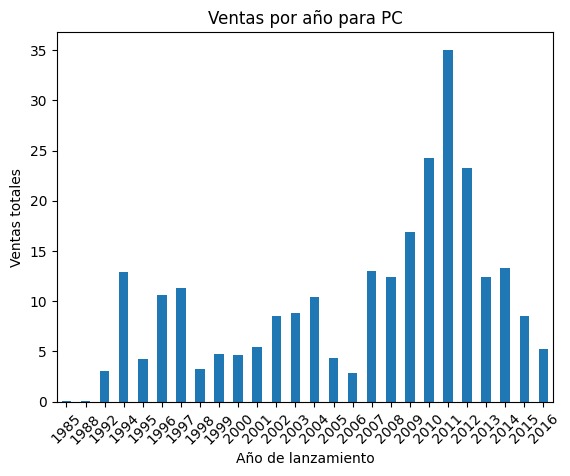

year_of_release
1985     0.04
1988     0.03
1992     3.03
1994    12.87
1995     4.22
1996    10.58
1997    11.27
1998     3.26
1999     4.74
2000     4.66
2001     5.47
2002     8.57
2003     8.84
2004    10.39
2005     4.37
2006     2.85
2007    13.04
2008    12.42
2009    16.91
2010    24.28
2011    35.03
2012    23.22
2013    12.38
2014    13.28
2015     8.52
2016     5.25
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2011


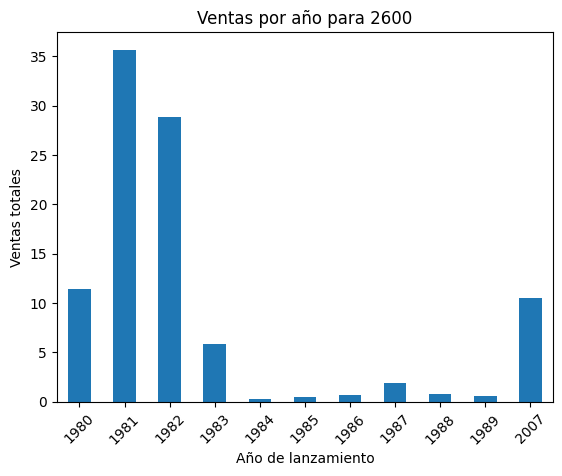

year_of_release
1980    11.38
1981    35.68
1982    28.88
1983     5.84
1984     0.27
1985     0.45
1986     0.67
1987     1.94
1988     0.74
1989     0.63
2007    10.50
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1981


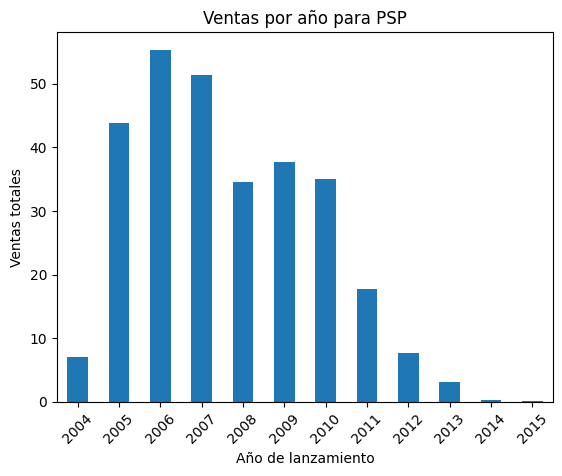

year_of_release
2004     7.06
2005    43.84
2006    55.32
2007    51.45
2008    34.55
2009    37.78
2010    35.04
2011    17.82
2012     7.69
2013     3.14
2014     0.24
2015     0.12
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2006


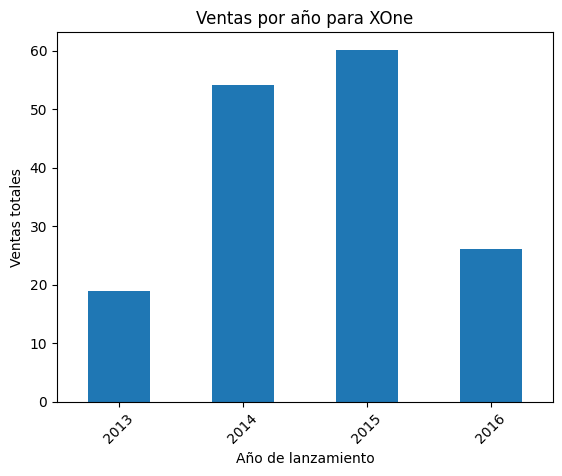

year_of_release
2013    18.96
2014    54.07
2015    60.14
2016    26.15
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2015


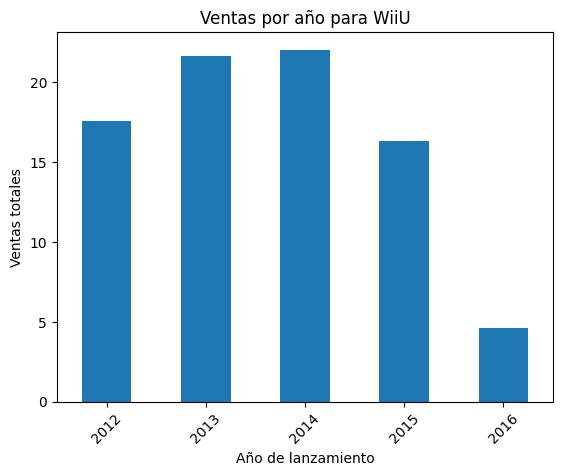

year_of_release
2012    17.56
2013    21.65
2014    22.03
2015    16.35
2016     4.60
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2014


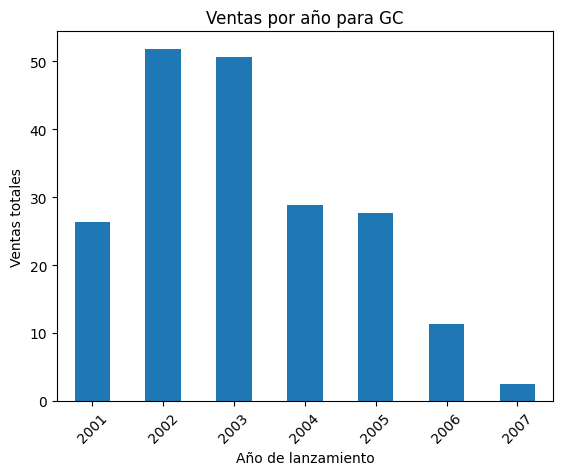

year_of_release
2001    26.34
2002    51.81
2003    50.61
2004    28.82
2005    27.62
2006    11.26
2007     2.47
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2002


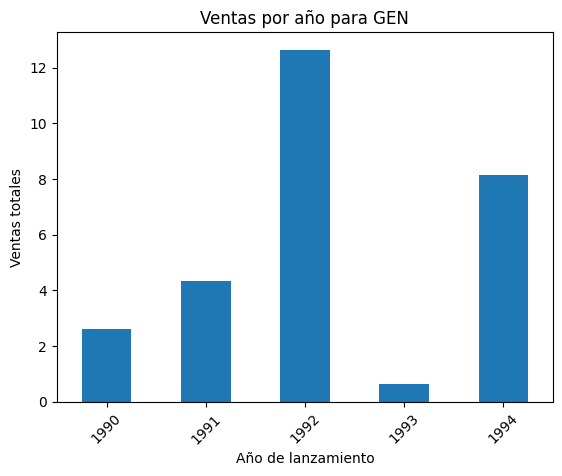

year_of_release
1990     2.60
1991     4.33
1992    12.64
1993     0.65
1994     8.13
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1992


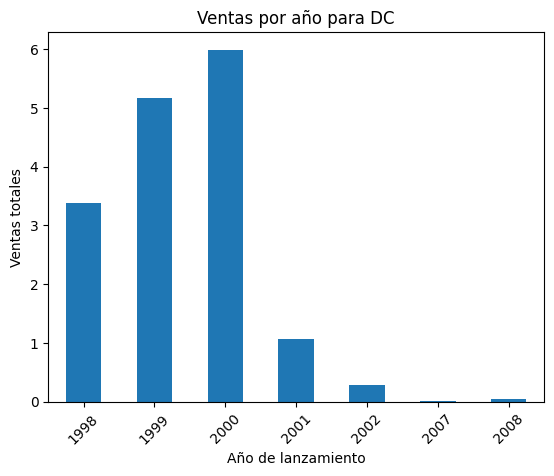

year_of_release
1998    3.38
1999    5.16
2000    5.99
2001    1.07
2002    0.29
2007    0.02
2008    0.04
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2000


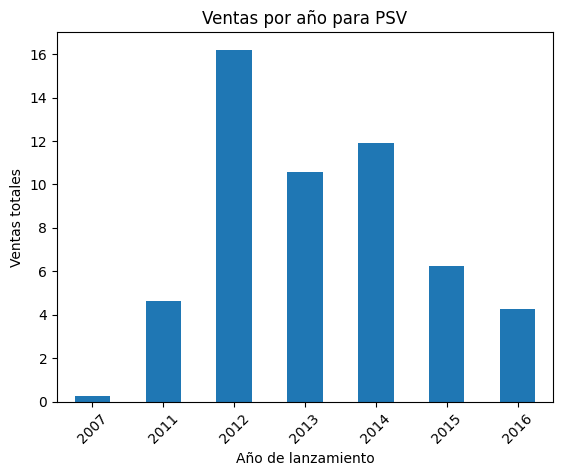

year_of_release
2007     0.26
2011     4.63
2012    16.19
2013    10.59
2014    11.90
2015     6.25
2016     4.25
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2012


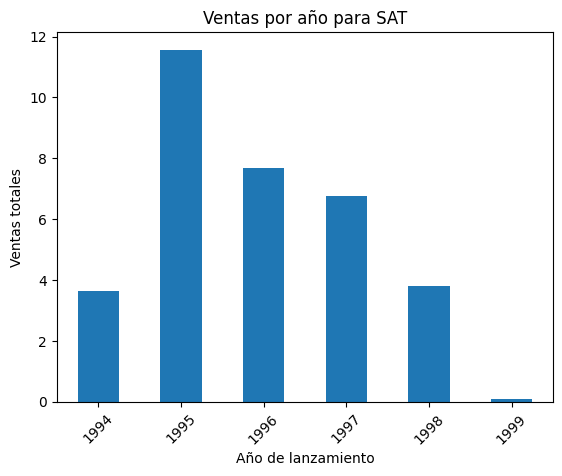

year_of_release
1994     3.65
1995    11.57
1996     7.69
1997     6.77
1998     3.82
1999     0.09
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1995


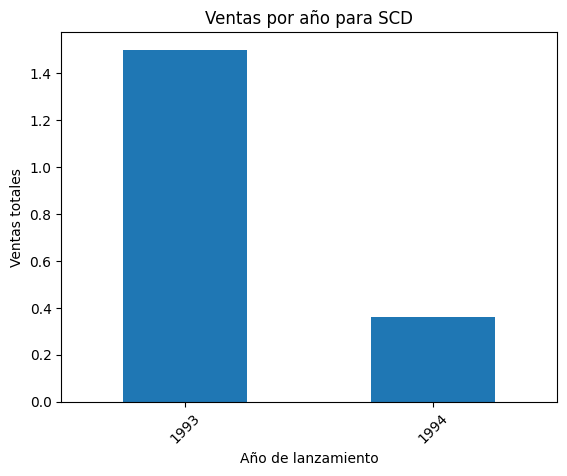

year_of_release
1993    1.50
1994    0.36
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1993


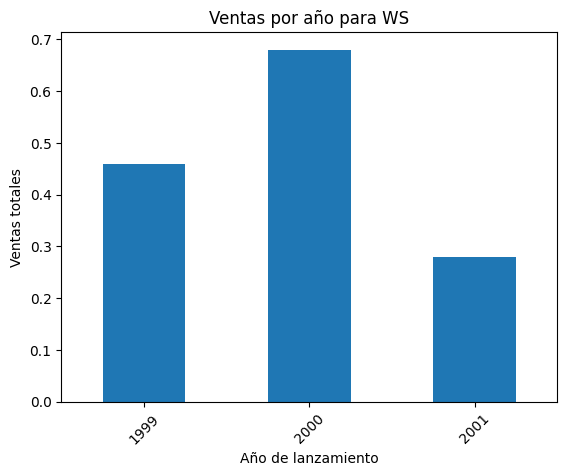

year_of_release
1999    0.46
2000    0.68
2001    0.28
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 2000


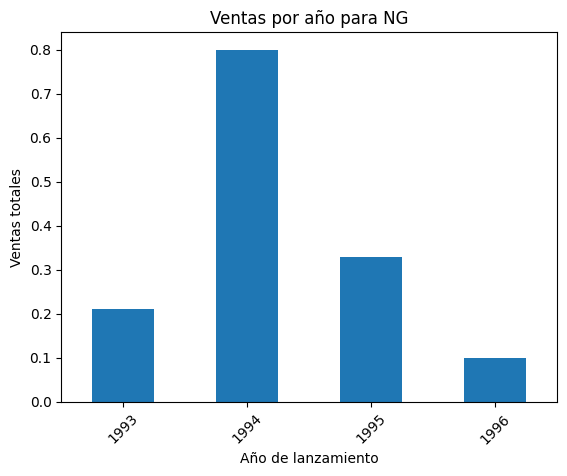

year_of_release
1993    0.21
1994    0.80
1995    0.33
1996    0.10
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1994


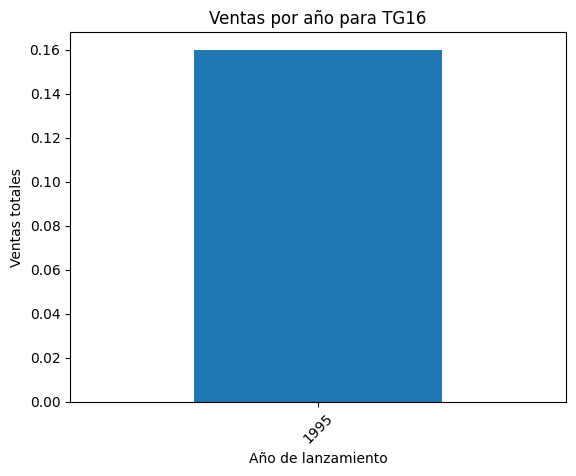

year_of_release
1995    0.16
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1995


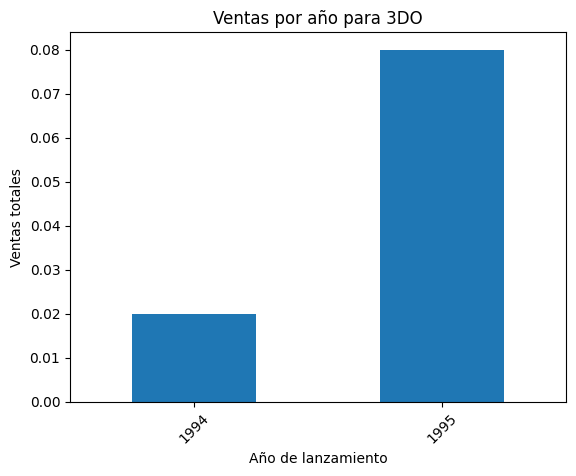

year_of_release
1994    0.02
1995    0.08
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1995


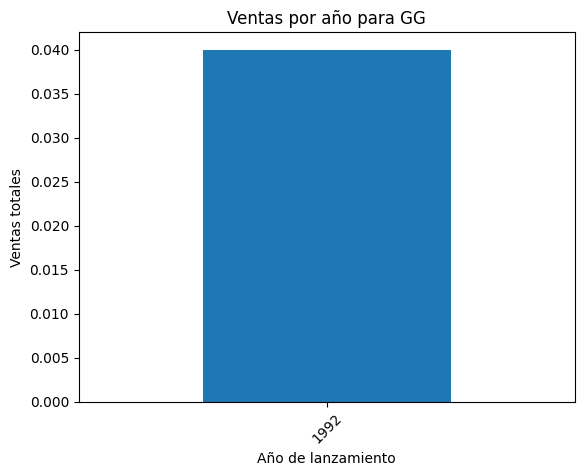

year_of_release
1992    0.04
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1992


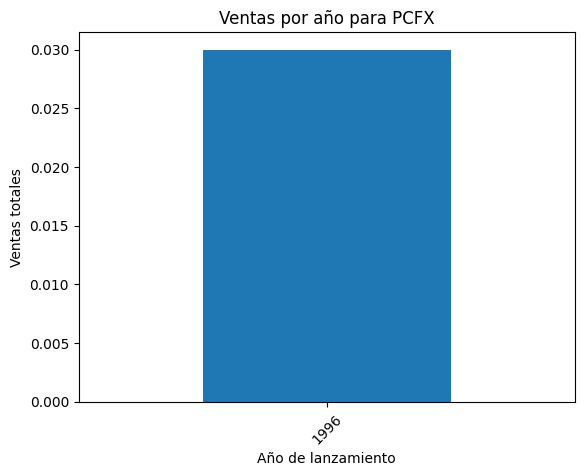

year_of_release
1996    0.03
Name: total_sales, dtype: float64
Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: 1996


In [84]:
#Calculemos las distribuciones de ventas por año de todas las plataformas.
def greatest_sellers(data, platform):
    result = data[data['platform'] == platform]
    result = result.groupby('year_of_release')['total_sales'].sum()
    return result

platforms = []

for i in pd.Series(df['platform'].unique()).values:
    platforms.append(i)

for platform in platforms:
    greatest_sellers(df, platform).plot(kind='bar', title=f'Ventas por año para {platform}')
    plt.xlabel('Año de lanzamiento')
    plt.ylabel('Ventas totales')
    plt.xticks(rotation=45)
    plt.show()
    print(greatest_sellers(df, platform))
    print(f"Podemos observar que los video juegos que mas se venden en esta platoforma son aquellos que fueron lanzados en el año: {greatest_sellers(df,platform).idxmax()}")
    

Podemos observar en el codigo de arriba que es un poco dificil predecir con exactitud el sesgo exacto de datos debido a su poca variabilidad en sus datos o porque los datos sueles son muy identicos. Lo podemos aseverar cuando nos ponemos a observar la disponibilidad de informacion de ciertas plataformas que incluso solo tienen 1 o 2 juegos sacados a la luz al igual que el mensaje de error arrojado en rojo.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste un estudio muy completo de las ventas por paltaforma. Aunque si queremos hacer una comparativa más directa es mejor si muestras toda la información en un único gráfico asignandole un color a cada plataforma. De esta forma, el análisis es más directo y fácil de hacer,.

</div>

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas ls diferencias en las ventas? ¿Que sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

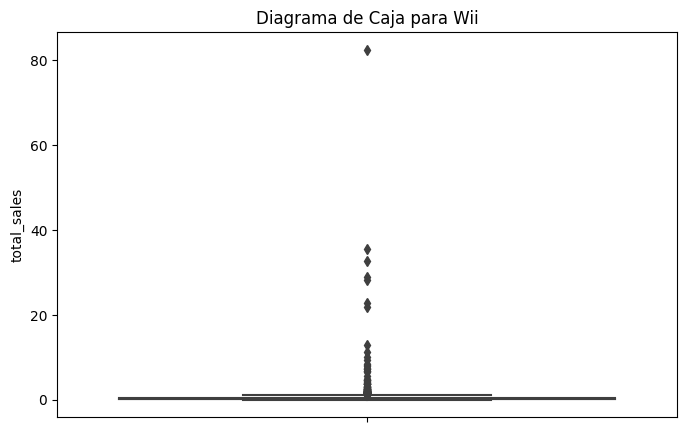

year_of_release
2006    137.15
2007    169.10
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64


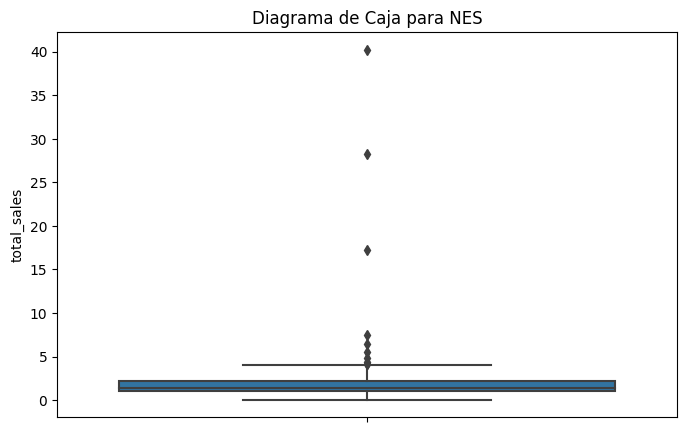

year_of_release
1983    10.96
1984    50.08
1985    53.44
1986    36.41
1987    19.76
1988    45.01
1989     7.85
1990    15.73
1991     6.11
1992     1.98
1993     3.61
1994     0.11
Name: total_sales, dtype: float64


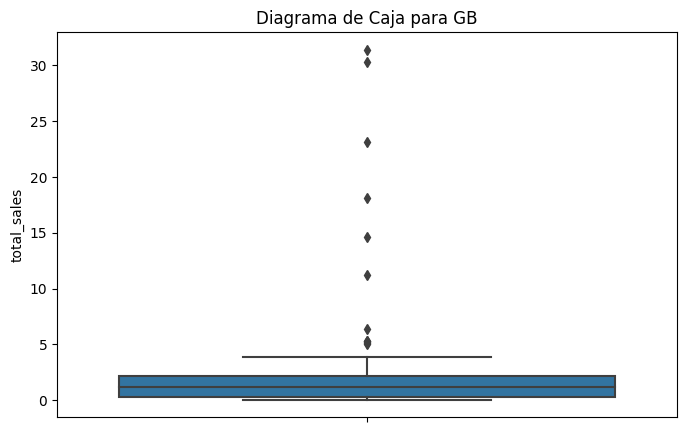

year_of_release
1988     1.43
1989    64.97
1990     4.89
1991     5.57
1992    25.49
1994    12.18
1995     3.60
1996    36.03
1997     6.37
1998    26.90
1999    38.00
2000    19.76
2001     9.24
2007     1.03
Name: total_sales, dtype: float64


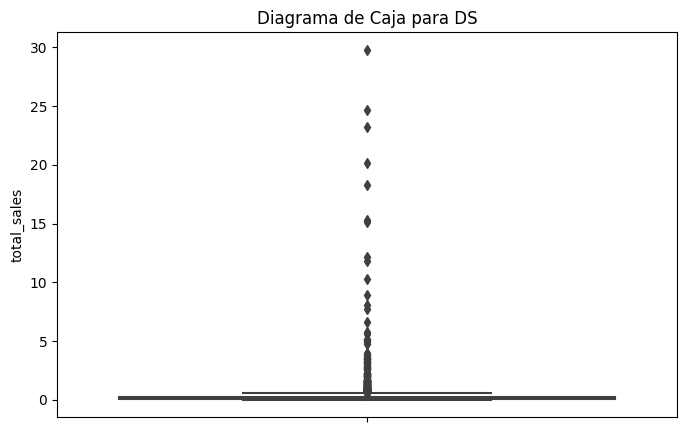

year_of_release
1985      0.02
2004     17.27
2005    130.14
2006    119.81
2007    150.28
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: total_sales, dtype: float64


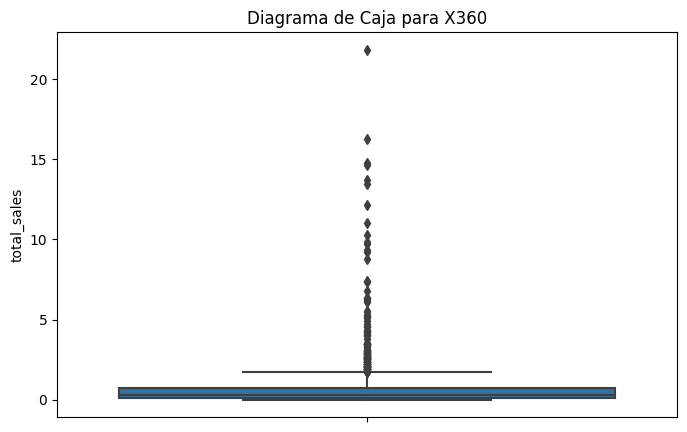

year_of_release
2005      8.25
2006     51.62
2007    105.59
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64


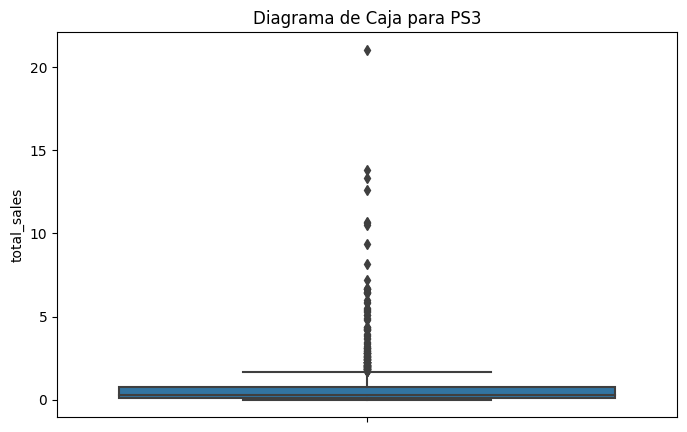

year_of_release
2006     20.96
2007     81.50
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64


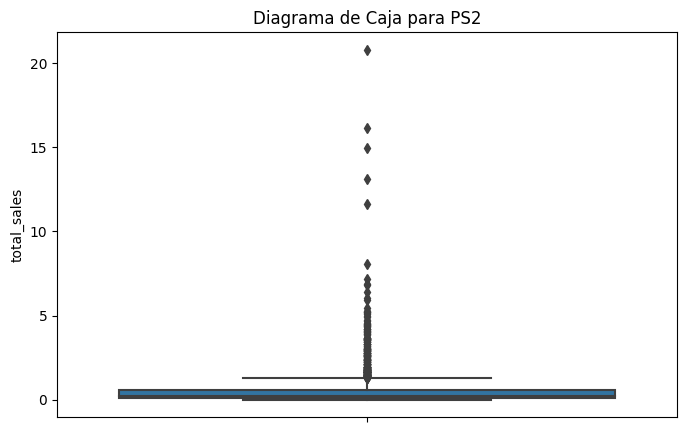

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     98.20
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64


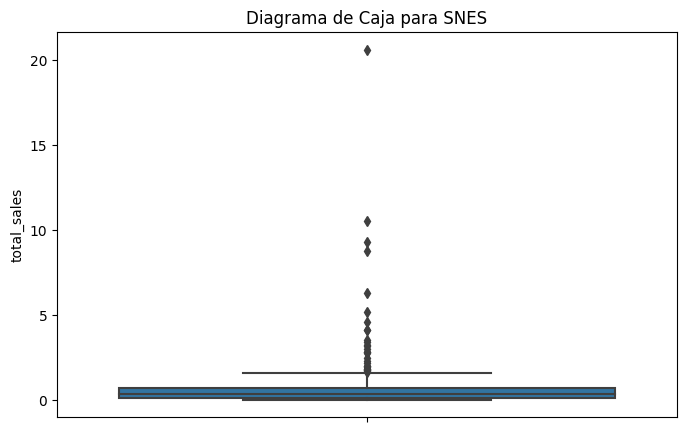

year_of_release
1990    26.15
1991    16.22
1992    32.98
1993    40.02
1994    35.08
1995    32.20
1996    15.92
1997     0.99
1998     0.22
1999     0.26
Name: total_sales, dtype: float64


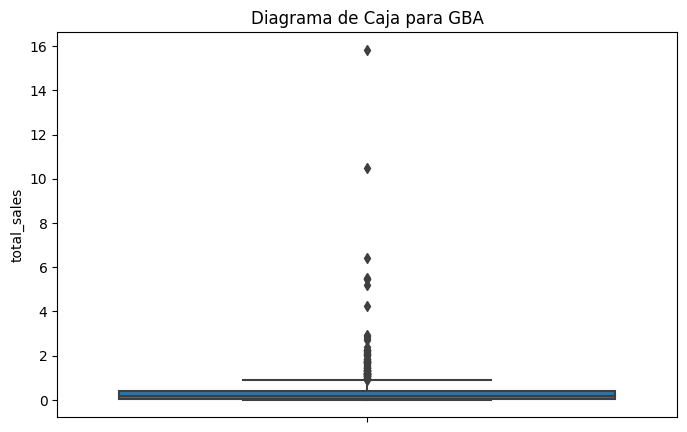

year_of_release
2000     0.07
2001    61.53
2002    74.16
2003    56.67
2004    77.91
2005    33.86
2006     5.28
2007     8.37
Name: total_sales, dtype: float64


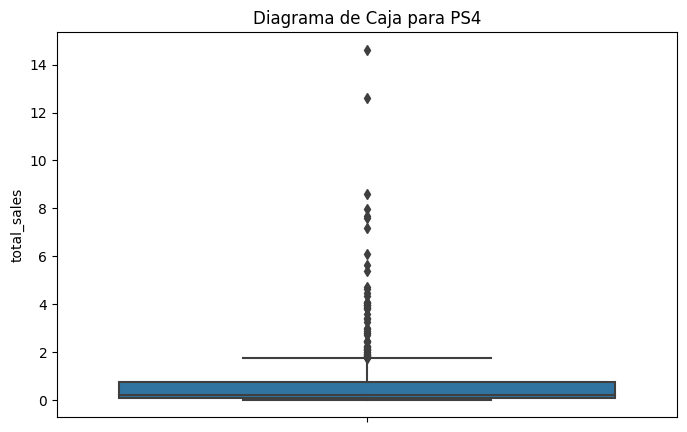

year_of_release
2013     25.99
2014    100.00
2015    118.90
2016     69.25
Name: total_sales, dtype: float64


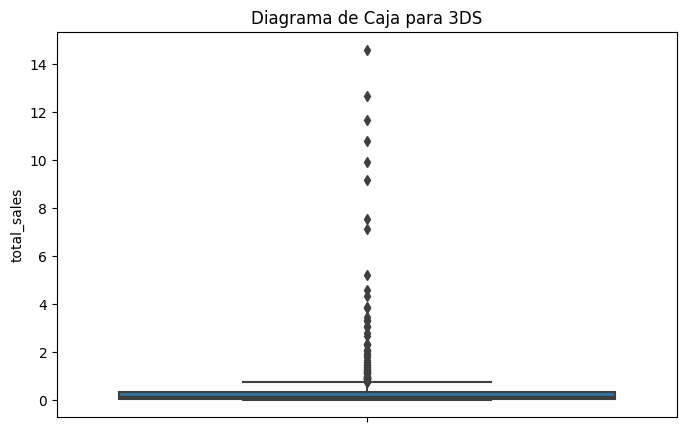

year_of_release
2007     1.19
2011    63.20
2012    51.36
2013    56.57
2014    43.76
2015    27.78
2016    15.14
Name: total_sales, dtype: float64


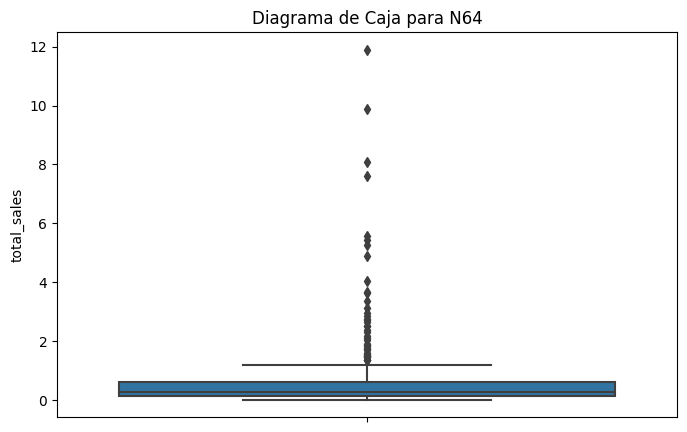

year_of_release
1996    34.10
1997    39.50
1998    49.24
1999    57.87
2000    33.97
2001     3.25
2002     0.08
2007     0.67
Name: total_sales, dtype: float64


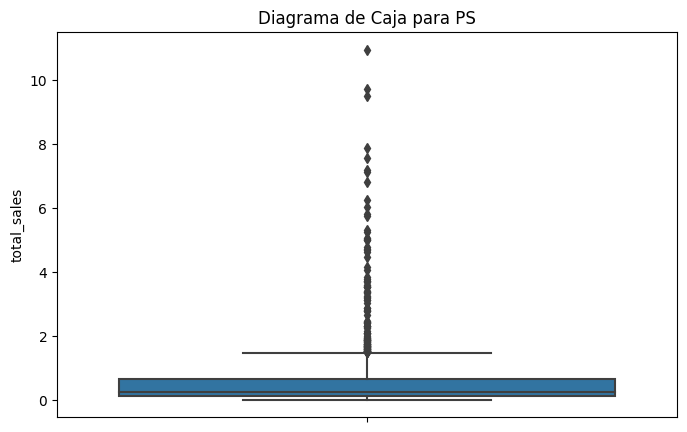

year_of_release
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000     96.37
2001     35.59
2002      6.67
2003      2.07
2007      3.28
Name: total_sales, dtype: float64


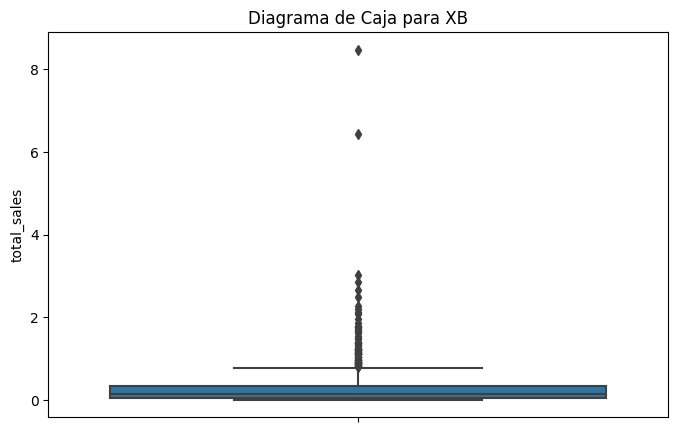

year_of_release
2000     0.99
2001    22.26
2002    48.01
2003    55.04
2004    65.42
2005    49.08
2006    10.04
2007     6.72
2008     0.18
Name: total_sales, dtype: float64


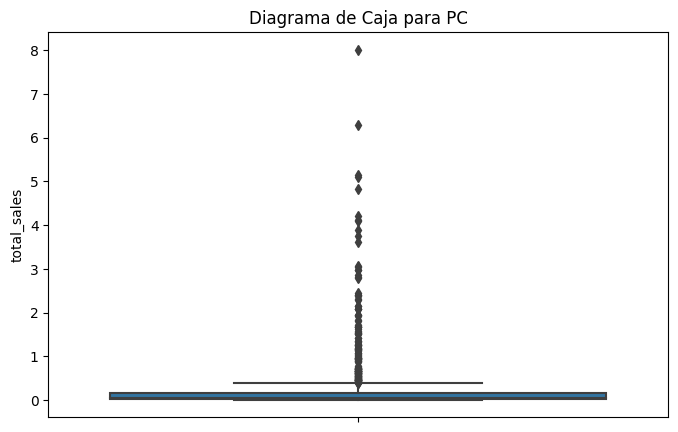

year_of_release
1985     0.04
1988     0.03
1992     3.03
1994    12.87
1995     4.22
1996    10.58
1997    11.27
1998     3.26
1999     4.74
2000     4.66
2001     5.47
2002     8.57
2003     8.84
2004    10.39
2005     4.37
2006     2.85
2007    13.04
2008    12.42
2009    16.91
2010    24.28
2011    35.03
2012    23.22
2013    12.38
2014    13.28
2015     8.52
2016     5.25
Name: total_sales, dtype: float64


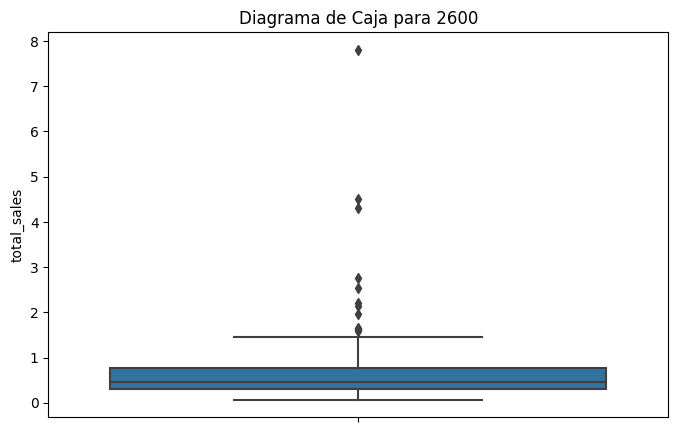

year_of_release
1980    11.38
1981    35.68
1982    28.88
1983     5.84
1984     0.27
1985     0.45
1986     0.67
1987     1.94
1988     0.74
1989     0.63
2007    10.50
Name: total_sales, dtype: float64


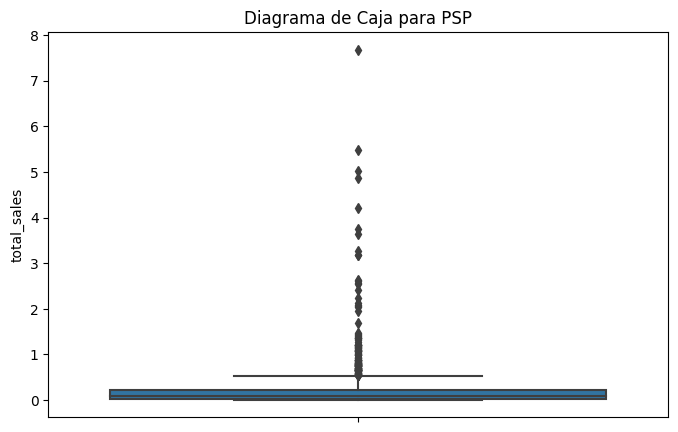

year_of_release
2004     7.06
2005    43.84
2006    55.32
2007    51.45
2008    34.55
2009    37.78
2010    35.04
2011    17.82
2012     7.69
2013     3.14
2014     0.24
2015     0.12
Name: total_sales, dtype: float64


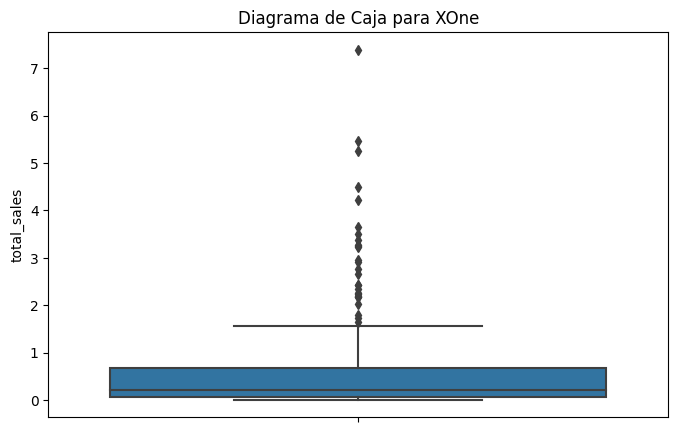

year_of_release
2013    18.96
2014    54.07
2015    60.14
2016    26.15
Name: total_sales, dtype: float64


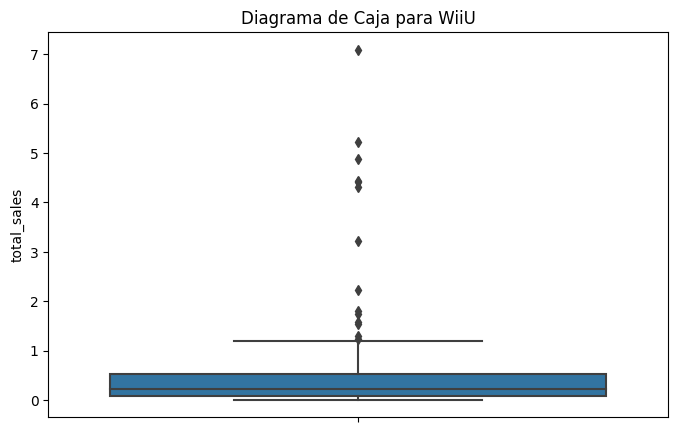

year_of_release
2012    17.56
2013    21.65
2014    22.03
2015    16.35
2016     4.60
Name: total_sales, dtype: float64


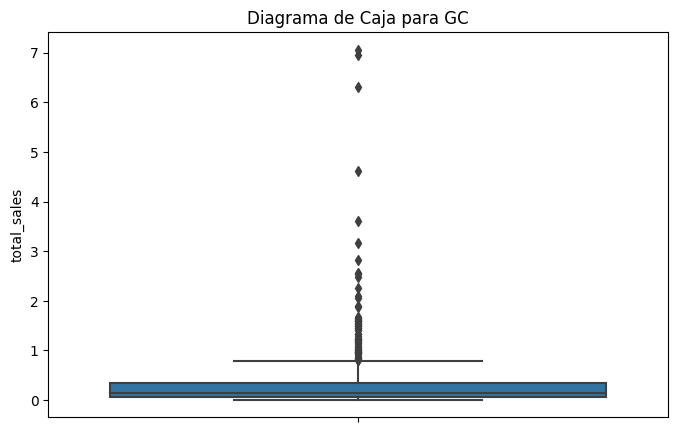

year_of_release
2001    26.34
2002    51.81
2003    50.61
2004    28.82
2005    27.62
2006    11.26
2007     2.47
Name: total_sales, dtype: float64


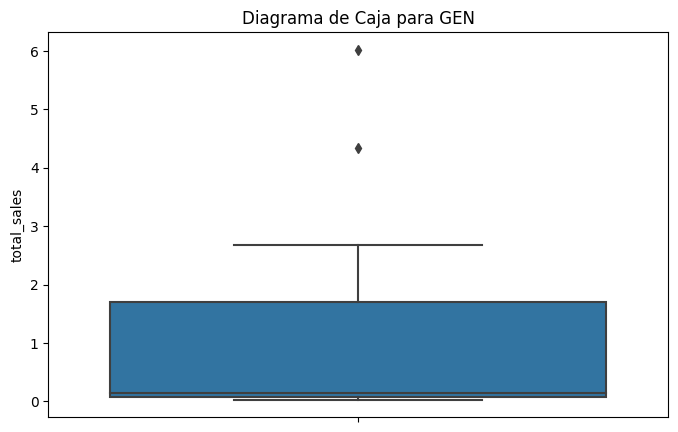

year_of_release
1990     2.60
1991     4.33
1992    12.64
1993     0.65
1994     8.13
Name: total_sales, dtype: float64


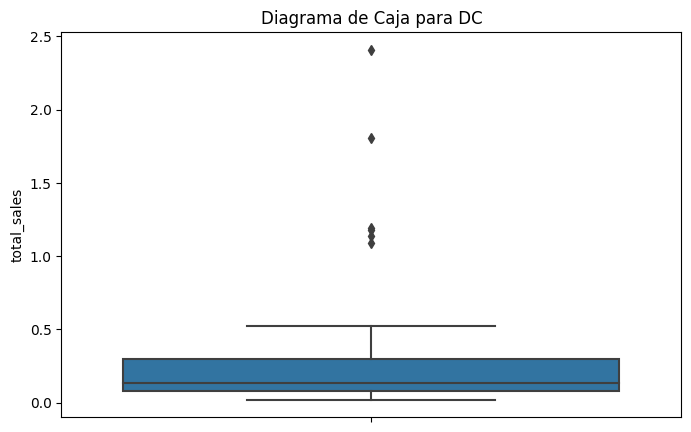

year_of_release
1998    3.38
1999    5.16
2000    5.99
2001    1.07
2002    0.29
2007    0.02
2008    0.04
Name: total_sales, dtype: float64


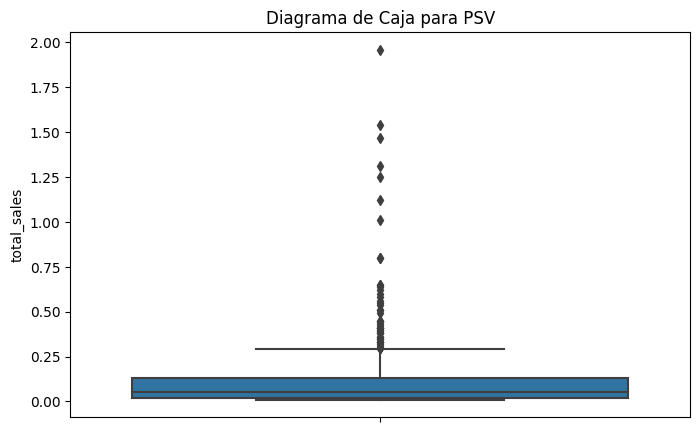

year_of_release
2007     0.26
2011     4.63
2012    16.19
2013    10.59
2014    11.90
2015     6.25
2016     4.25
Name: total_sales, dtype: float64


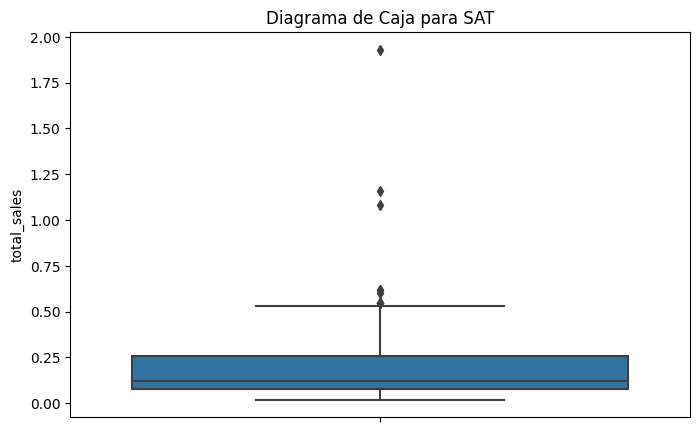

year_of_release
1994     3.65
1995    11.57
1996     7.69
1997     6.77
1998     3.82
1999     0.09
Name: total_sales, dtype: float64


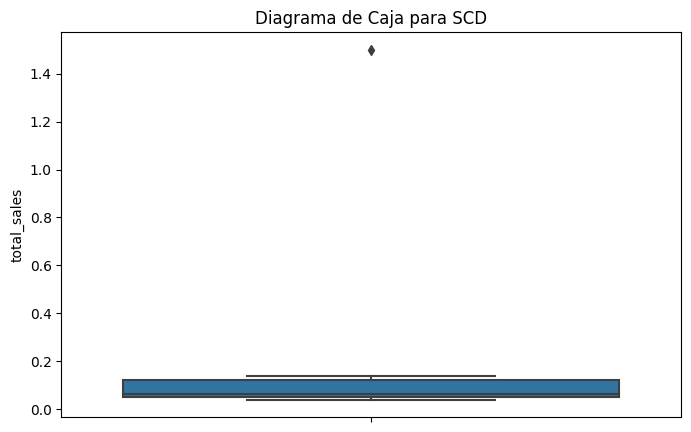

year_of_release
1993    1.50
1994    0.36
Name: total_sales, dtype: float64


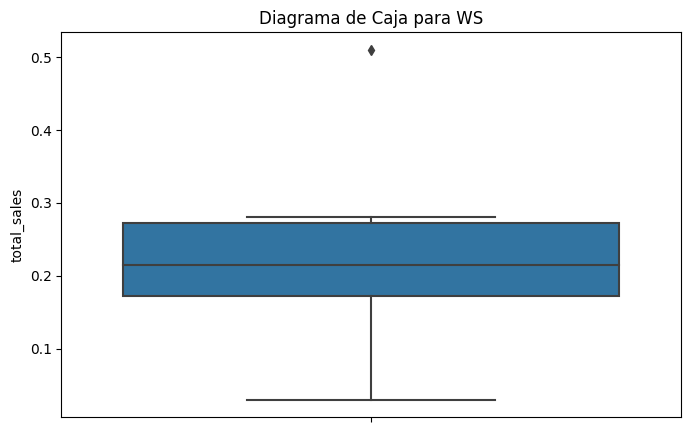

year_of_release
1999    0.46
2000    0.68
2001    0.28
Name: total_sales, dtype: float64


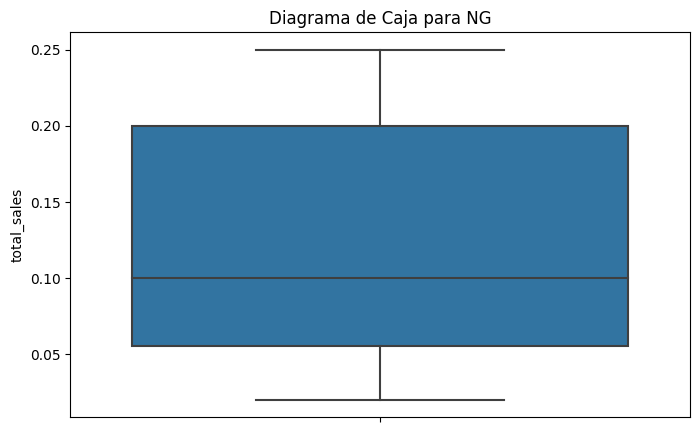

year_of_release
1993    0.21
1994    0.80
1995    0.33
1996    0.10
Name: total_sales, dtype: float64


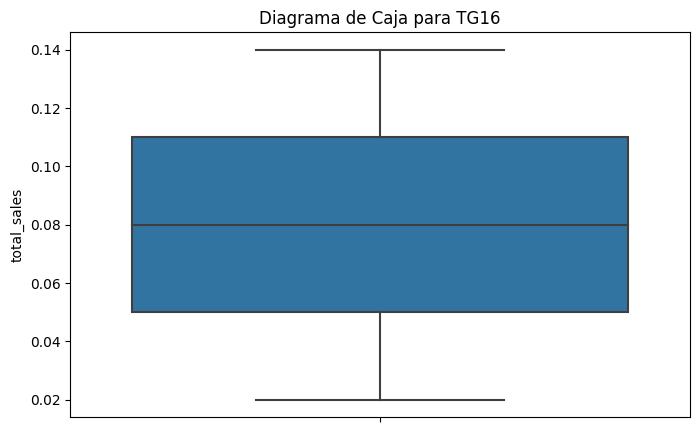

year_of_release
1995    0.16
Name: total_sales, dtype: float64


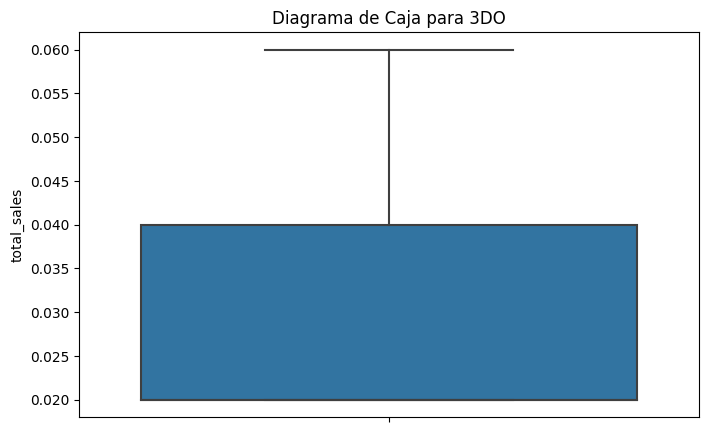

year_of_release
1994    0.02
1995    0.08
Name: total_sales, dtype: float64


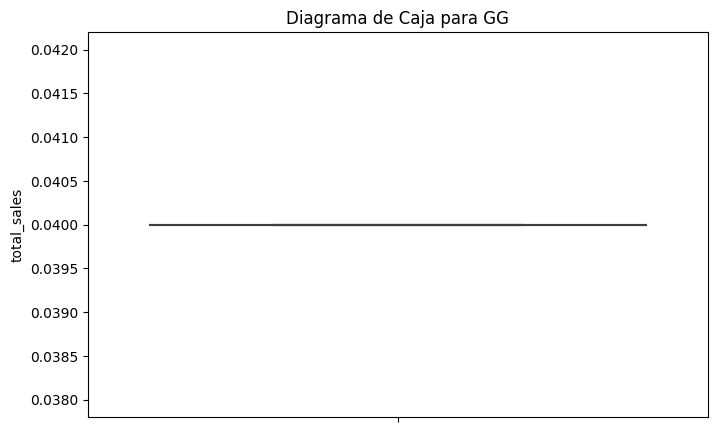

year_of_release
1992    0.04
Name: total_sales, dtype: float64


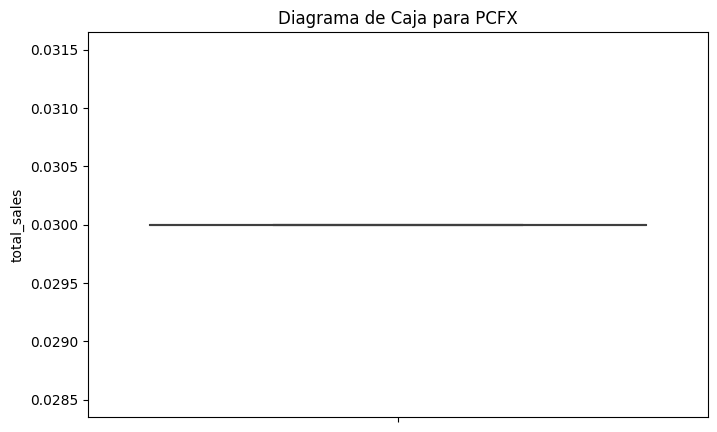

year_of_release
1996    0.03
Name: total_sales, dtype: float64


In [85]:
def boxplots(data, platform):

    result = data[data['platform'] == platform]
    sales_by_year = result.groupby('year_of_release')['total_sales'].sum()
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=result, y='total_sales')  
    plt.title(f"Diagrama de Caja para {platform}")
    plt.show()
    
    return sales_by_year  

plot_platforms = df['platform'].unique().tolist()

for plot in plot_platforms:
    print(boxplots(df, plot))

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabjo David. Como sugerencia, cuando tengas gráficas *box-plot* con cajas muy "estrechas" debido a la presencia de numerosos datos atípicos, considera incluir una versión adicional usando escala logarítmica. Esto facilitará la comparación y el análisis de los datos.

</div>

Podemos verificar por medio de los diagramas de caja que tecnicamente en todas las plataformas hay valores anomales lo que hace que los diagramas de caja se vean asimetricos y no como una distribucion normal luciria, por lo cual procederemosa filtrar los valores anomalos.

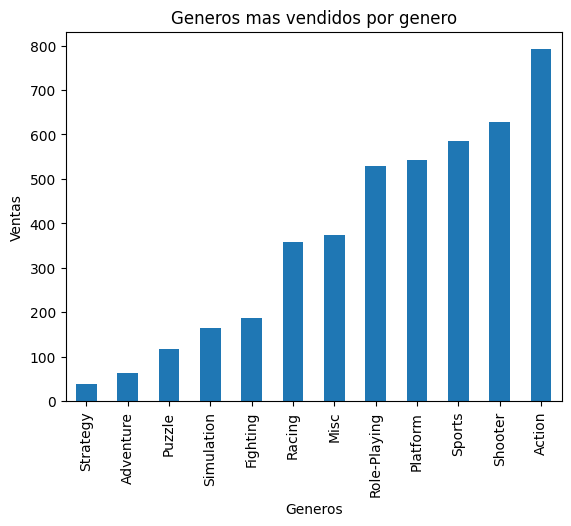

                                              name platform  year_of_release  \
0                                       Wii Sports      Wii             2006   
1                                Super Mario Bros.      NES             1985   
2                                   Mario Kart Wii      Wii             2008   
3                                Wii Sports Resort      Wii             2009   
4                         Pokemon Red/Pokemon Blue       GB             1996   
..                                             ...      ...              ...   
185                        New Super Mario Bros. U     WiiU             2012   
186  Dragon Quest VIII: Journey of the Cursed King      PS2             2004   
187                            Super Mario Bros. 3      GBA             2003   
188       Professor Layton and the Curious Village       DS             2007   
189                 Super Mario Land 3: Wario Land       GB             1994   

            genre  na_sales  eu_sales  

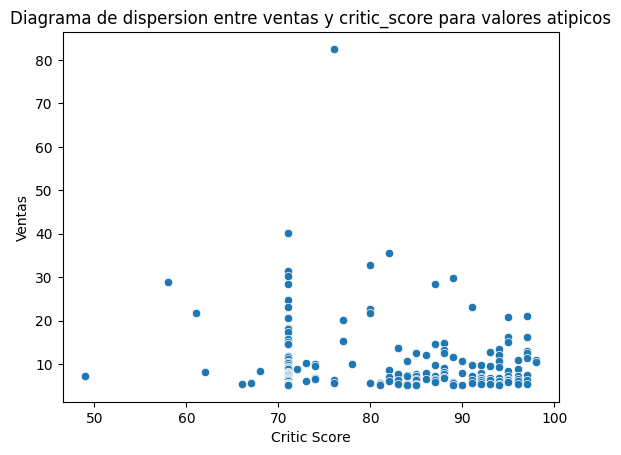

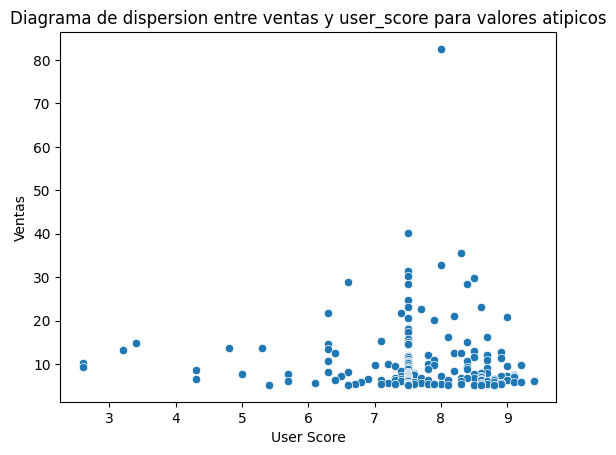

In [86]:
Q1 = df['total_sales'].quantile(0.25)
Q3 = df['total_sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 3 * IQR

altosenventas = df[df['total_sales'] > upper_bound]
bajosenventas = df[df['total_sales'] < lower_bound]

altosenventas = altosenventas.groupby('genre')['total_sales'].sum()
altosenventas.sort_values(inplace=True)
altosenventas.plot(kind='bar')
plt.title('Generos mas vendidos por genero')
plt.xlabel('Generos')
plt.ylabel('Ventas')
plt.show()

df['z_score'] = st.zscore(df['total_sales'])
outliers_z_3 = df[df['z_score'].abs()>3]
print(outliers_z_3)

sns.scatterplot(data=outliers_z_3, x='critic_score', y='total_sales')
plt.title('Diagrama de dispersion entre ventas y critic_score para valores atipicos')
plt.xlabel('Critic Score')
plt.ylabel('Ventas')
plt.show()

sns.scatterplot(data=outliers_z_3, x='user_score', y='total_sales')
plt.title('Diagrama de dispersion entre ventas y user_score para valores atipicos')
plt.xlabel('User Score')
plt.ylabel('Ventas')
plt.show()


Los puntos estan bastante dispersos, lo que sugiere que una mejor puntuacion de los criticos no necesariamente se traduce en mas ventas. Hay una acumulacion notable de putnos alreadedor de 70 y 90, lo que podria indicar que muchos juegos tienen puntuaciones en ese rango. Aunque menos frecuentes, algunos juegos con puntuaciones inferiores a 70 han logrado ventas significativas.

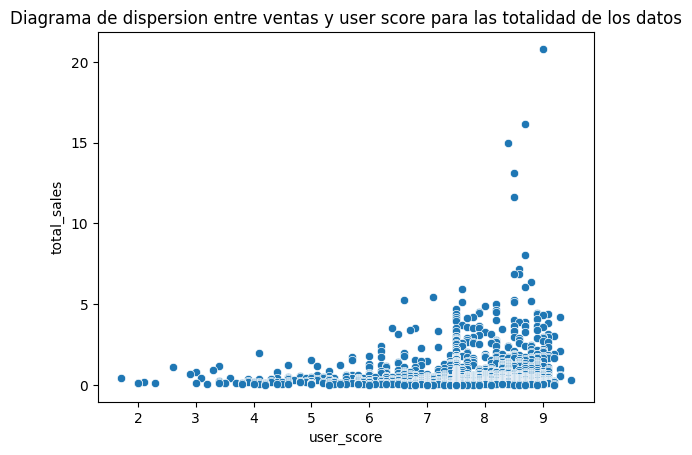

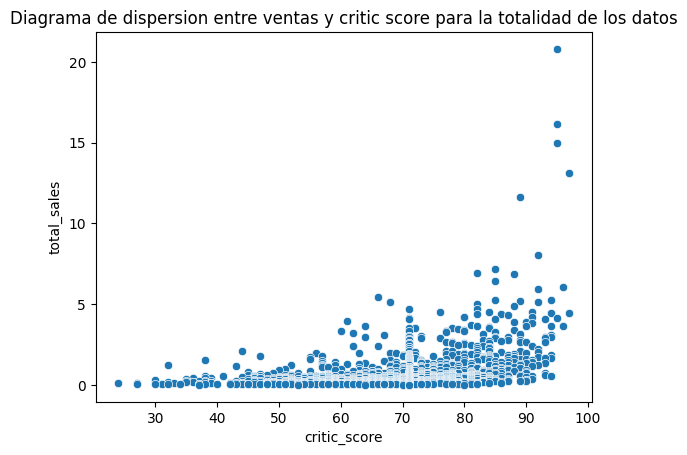

In [87]:
scatterplot_graph = df[df['platform'] == 'PS2']
sns.scatterplot(data=scatterplot_graph, x='user_score', y='total_sales')
plt.title('Diagrama de dispersion entre ventas y user score para las totalidad de los datos')
plt.show()


sns.scatterplot(data=scatterplot_graph, x='critic_score', y='total_sales')
plt.title('Diagrama de dispersion entre ventas y critic score para la totalidad de los datos')
plt.show()

La mayoria de los videojuegos tienen ventas muy bajas, sin importar su calificacion. Algunos juegos con puntuaciones entre 7 y 9 tienen ventas significativamente mas altas. Hay una gran cantidad de juegos con bajas ventas. (cercanas a 0), incluso para calificaciones altas. Solo unos pocos juegos han alcanzado ventas superiores a 15 millones de unidades, y estos estan en el rango de puntuaciones altas (8-9). No parece hacer una relacion linearl clara entre la puntuacion de los usuarios y las ventas. Sim embargo, los juegos con puntajes mas altos (cercanos a 9) parecen tener mayor probabilidad de vender mas copias. No hay muchos juegos con puntajes bajos (2-5) que tengan altas ventas. Se observan algunos putnos extremos (outliers) con ventas muy altas (>15m), que pueden ser titulos extremadamente populares. Este analisis aplica tambien para los diagramas de caja.

In [88]:
correlation = df[['user_score', 'total_sales']].corr()
print(correlation)

correlation2 = df[['critic_score', 'total_sales']].corr()
print(correlation2)

             user_score  total_sales
user_score     1.000000     0.048768
total_sales    0.048768     1.000000
              critic_score  total_sales
critic_score      1.000000     0.189777
total_sales       0.189777     1.000000


La correlacion entre ambos parametros es relativamente debil.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu interpretación de los datos es clara y precisa, destacando que, aunque no existe una relación lineal clara entre las puntuaciones de los usuarios y las ventas, los juegos con calificaciones más altas (cercanas a 9) tienden a tener una mayor probabilidad de vender más copias. Has identificado correctamente que la mayoría de los videojuegos tienen ventas bajas, independientemente de su calificación, y que solo unos pocos títulos alcanzan ventas excepcionales, lo que sugiere que factores adicionales, como el marketing o la franquicia, podrían influir en estos resultados. La presencia de outliers con ventas muy altas refuerza la idea de que algunos juegos tienen un éxito desproporcionado en el mercado. Para futuros análisis, podrías explorar cómo otros factores, como el género o la plataforma, interactúan con las calificaciones para influir en las ventas. 

</div>

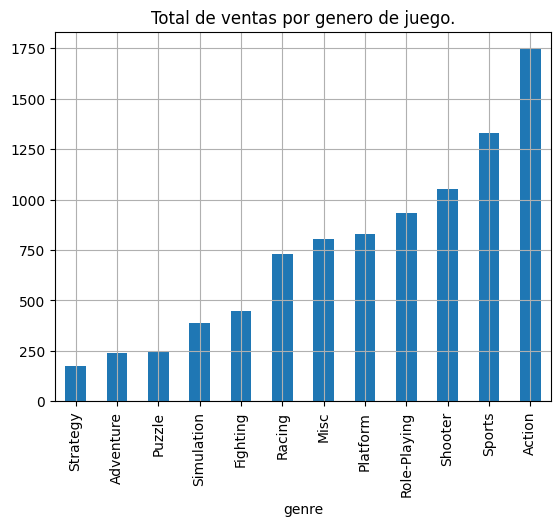

In [89]:
#Echa un vistazo a la distribucion general de los juegos por genero.
genres = df.groupby('genre')['total_sales'].sum()
genres.sort_values(ascending=True, inplace=True)
genres.plot(kind='bar', grid=True, title='Total de ventas por genero de juego.')
plt.show()

¿Que se puede decir de los generos mas rentables? ¿Puedes generalizar acerca de los generos con ventas mas altas y bajas.?
Podemos generalizar diciendo que los generos Action, Sports y Shooter tienen las ventas mas altas pero no podemos generalizar diciendo que un grupo particular de generos tiene las ventas mas bajas debido a que todos los generos tienen ventas anormales que hacen que la media se desvie mucho de le mediana haciendo que todos los generos tengan ventas superiores a la media.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo indentificando los generos más populares, este tipo de información es clave para entender las dinámicas del mercado.

</div>

## PASO 4. CREA UN PERFIL DE USUARIO PARA CADA REGION.
### Para cada region (NA, UE, JP) determina:
### Las cinco plataformas. Describe las variaciones en sus cuotas de mercado de una region a otra. 
### Los cinco generos principales. Explica la diferencia. 
### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [90]:
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77            71         7.5      E   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
4      8.89     10.22         1.00            71         7.5      E   

   total_sales    z_score  
0        82.54  52.967816  
1        40.24  25.646402  
2 

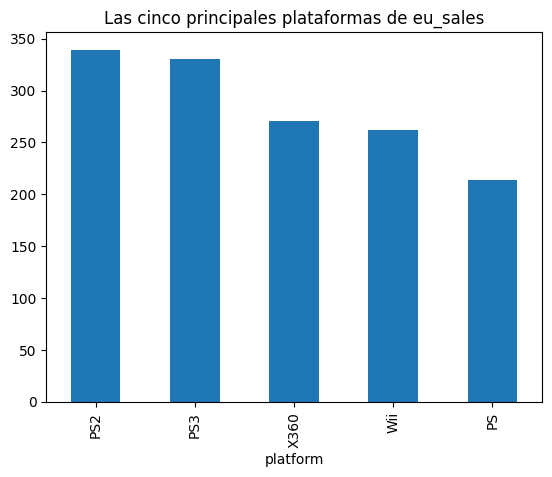

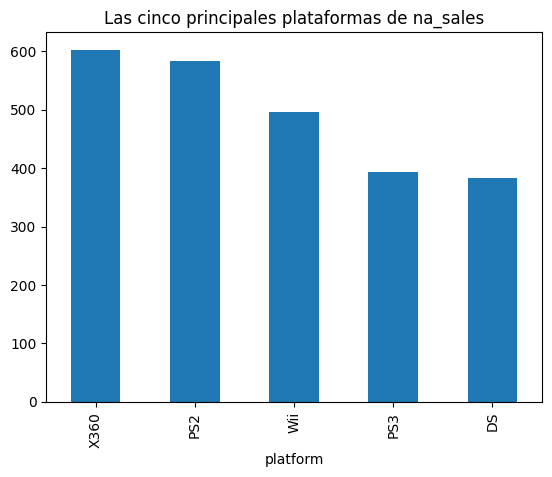

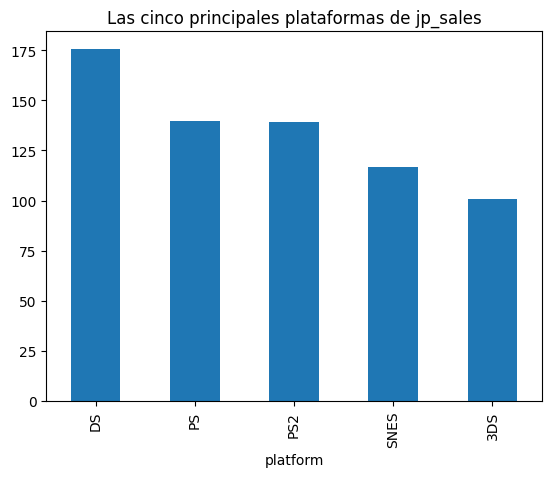

In [107]:
def country_platform(data, column):
    result = data.groupby('platform')[column].sum().sort_values(ascending=False)
    result = result.head(5)
    result.plot(kind='bar', title=f'Las cinco principales plataformas de {column}')
    plt.show()
    return result

columns = ['eu_sales', 'na_sales', 'jp_sales']

for i in columns:
    country_platform(df, i)

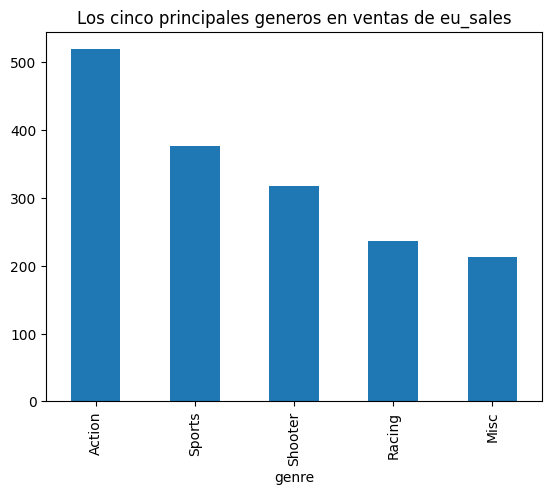

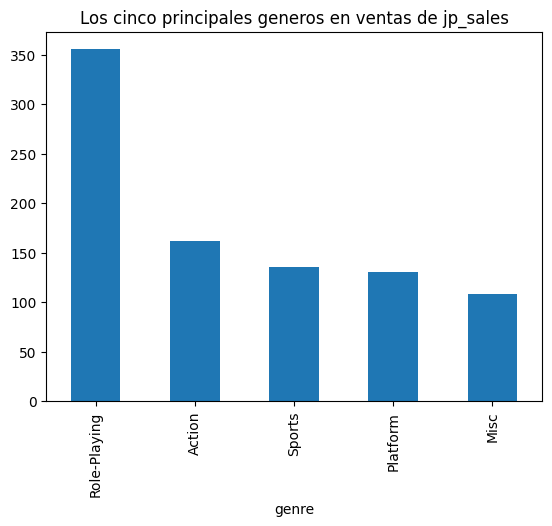

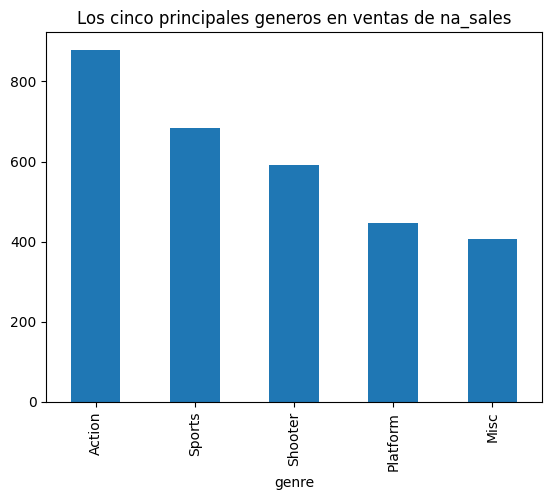

In [92]:
def country_genre(data, column):
    result = data.groupby('genre')[column].sum().sort_values(ascending=False)
    result = result.head(5)
    result.plot(kind='bar', title=f'Los cinco principales generos en ventas de {column}')
    plt.show()
    return result



for i in columns:
    country_genre(df, i)

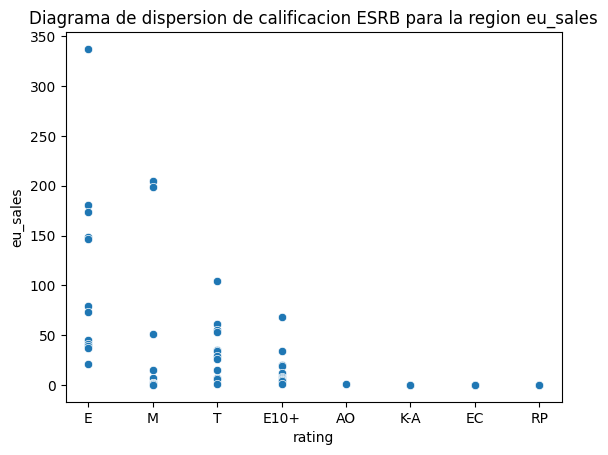

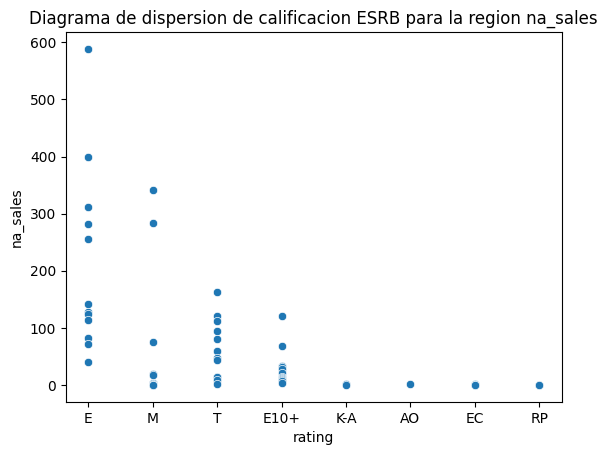

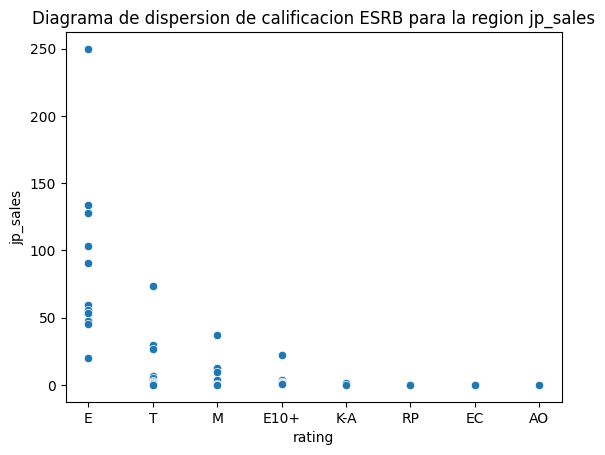

In [117]:

def esrb(data, column):
    scatterplot_region = df.groupby(['genre', 'rating'])[column].sum().sort_values(ascending=False).reset_index()
    sns.scatterplot(data=scatterplot_region, x='rating', y=column)
    plt.title(f'Diagrama de dispersion de calificacion ESRB para la region {column}')
    plt.show()
    return scatterplot_region

for i in columns:
    esrb(df, i)

Podemos verificar que efectivamente las calificaciones influyen igualemente en las tres regiones para poder pronosticar la cantidad de ventas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste un gran trabajo obteniendo la información por región. Se observan diferencias marcadas entre el mercado occidental y el asiatico. 
    
<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

De forma similar al comentario que te hice más arriba, acá puedes unificar las gráficas en una sola, asignandole un color a cada región, para que el análisis sea más sencillo.
    


</div>

</div>

## Prueba las siguientes hipotesis.
### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [119]:
print(df['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [126]:
xbox_one = df[df['platform'] == 'XOne']['user_score']
pc = df[df['platform'] == 'PC']['user_score']

alpha = 0.05
results = st.ttest_ind(xbox_one, pc)
print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

valor p:  0.00010123955107193582
No hay diferencia entre las calificaciones de los jugadores de ambas plataformas (Hipotesis nula.)


### Las calificaciones promedio de los usuarios para los generos de Accion y Deportes son diferentes.

In [124]:
print(df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [127]:
sports_genre = df[df['genre'] == 'Sports']['user_score']
action_genre = df[df['genre'] == 'Action']['user_score']

alpha = 0.05

results = st.ttest_ind(sports_genre, action_genre)
print('valor p: ', results.pvalue)

if(results.pvalue < alpha):
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula.')
    

valor p:  0.7131417795320426
No podemos rechazar la hipotesis nula.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

David aplicaste correctamente la prueba de hipótesis comparando la media de dos muestras independientes. Sin embargo, te recomiendo realizar previamente una prueba de  [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equla_var** en la función `ttest_ind`. Esto permitirá una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.
</div>

# CONCLUSION.
### Fuimos desglosando desde el total de venta por plataforma hasta que llegamos a varias metricas para poder canalizarlas a la campaña de marketing. Las principlaes plataformas en las que te teines que enfocar son: PS2, PS3, X360, Wii, DS, PS. Los principlaes generos son: Action, Sports, Shooter, Role-Playing. Y la calificacion que mas reditua es la calificacion E ya que segun los diagramas de dispersion de las 3 regiones es el que mayor cantidad de ventas tiene. 